In [28]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress


In [29]:
# Read in CSV files
nat_income = pd.read_csv("output/adj_net_national_income_cleaned_full.csv")
inflation = pd.read_csv("output/inflation_consumer_prices_cleaned_full.csv")
gdp = pd.read_csv("output/gdp_cleaned_full.csv")
life_exp = pd.read_csv("output/life_expectancy_cleaned.csv")
suicide_rate = pd.read_csv("output/suicide_rate_cleaned.csv")
unemployment = pd.read_csv("output/unemployment_rate_cleaned.csv")



In [30]:
# Convert to pandas dataframes
nat_income_df = pd.DataFrame(nat_income)
inflation_df = pd.DataFrame(inflation)
gdp_df = pd.DataFrame(gdp)
life_exp_df = pd.DataFrame(life_exp)
suicide_rate_df = pd.DataFrame(suicide_rate)
unemployment_df = pd.DataFrame(unemployment)


In [31]:
# Preview dataframe
nat_income_df


,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,Albania,ALB,3.981527e+09,5.152981e+09,6.556505e+09,7.323051e+09,8.188155e+09,9.588090e+09,1.130265e+10,...,1.018347e+10,1.083071e+10,1.016081e+10,1.088664e+10,1.110669e+10,9.411883e+09,9.903308e+09,1.066838e+10,1.237962e+10,1.237900e+10
1,2,Algeria,DZA,4.228057e+10,4.951915e+10,6.136434e+10,6.851646e+10,7.805549e+10,9.498747e+10,1.203620e+11,...,1.234800e+11,1.461620e+11,1.537210e+11,1.556530e+11,1.605260e+11,1.312600e+11,1.328030e+11,1.383400e+11,1.368790e+11,1.356890e+11
2,5,Angola,AGO,9.936398e+09,1.216515e+10,1.301680e+10,1.844962e+10,2.603712e+10,3.001159e+10,2.964080e+10,...,4.250390e+10,5.771448e+10,7.141687e+10,8.258646e+10,9.722255e+10,8.998094e+10,7.838634e+10,8.871823e+10,6.416750e+10,5.623245e+10
3,7,Argentina,ARG,7.485151e+10,1.016370e+11,1.218960e+11,1.470900e+11,1.913700e+11,2.420370e+11,3.038340e+11,...,3.514700e+11,4.411680e+11,4.520350e+11,4.579470e+11,4.365770e+11,5.049830e+11,4.706690e+11,5.502860e+11,4.366490e+11,3.713230e+11
4,8,Armenia,ARM,2.062125e+09,2.467616e+09,3.203973e+09,4.419908e+09,5.853474e+09,8.521311e+09,1.094712e+10,...,8.398953e+09,9.080777e+09,9.592550e+09,1.030468e+10,1.062332e+10,9.466501e+09,9.300817e+09,1.035383e+10,1.094827e+10,1.189271e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,261,Sub-Saharan Africa,SSF,3.431770e+11,4.327570e+11,5.326820e+11,6.214340e+11,7.416720e+11,8.356300e+11,9.127440e+11,...,1.081030e+12,1.197290e+12,1.267960e+12,1.368420e+12,1.448670e+12,1.376370e+12,1.293750e+12,1.358000e+12,1.417440e+12,1.467570e+12
207,262,Sub-Saharan Africa (excluding high income),SSA,3.426160e+11,4.321620e+11,5.319110e+11,6.205990e+11,7.407520e+11,8.347770e+11,9.119610e+11,...,1.080220e+12,1.196470e+12,1.267090e+12,1.367320e+12,1.447580e+12,1.375250e+12,1.292610e+12,1.356780e+12,1.416120e+12,1.466250e+12
208,263,Sub-Saharan Africa (IDA & IBRD countries),TSS,3.431770e+11,4.327570e+11,5.326820e+11,6.214340e+11,7.416720e+11,8.356300e+11,9.127440e+11,...,1.081030e+12,1.197290e+12,1.267960e+12,1.368420e+12,1.448670e+12,1.376370e+12,1.293750e+12,1.358000e+12,1.417440e+12,1.467570e+12
209,264,Upper middle income,UMC,3.531560e+12,3.929430e+12,4.670160e+12,5.567750e+12,6.634660e+12,8.251570e+12,9.871340e+12,...,1.159360e+13,1.371780e+13,1.483630e+13,1.585330e+13,1.641130e+13,1.539950e+13,1.534100e+13,1.697440e+13,1.788490e+13,1.814920e+13


In [32]:
# Preview dataframes
inflation_df.head()


,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,Albania,ALB,7.770526,0.484003,2.280019,2.366582,2.370728,2.932682,3.320871,...,3.626047,3.429123,2.031593,1.937621,1.625865,3.501208,-0.367317,2.060598,2.028060,1.411091
1,2,Algeria,DZA,1.418302,4.268954,3.961800,1.382447,2.311499,3.678996,4.858591,...,3.911062,4.524212,8.891451,3.254239,2.916927,4.784447,6.397695,5.591116,4.269990,1.951768
2,5,Angola,AGO,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,...,14.469656,13.482468,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704
3,6,Antigua and Barbuda,ATG,2.407658,1.993531,2.030078,2.098752,1.787785,1.416053,5.333806,...,3.370025,3.456750,3.376880,1.059498,1.089442,0.968993,-0.489438,2.432488,1.207158,1.431356
4,8,Armenia,ARM,1.060049,4.721553,6.961261,0.638928,2.892357,4.407361,8.949953,...,8.176361,7.650008,2.558020,5.789668,2.981309,3.731691,-1.403608,0.969553,2.520234,1.443447


In [33]:
# Preview dataframes
gdp_df.head()


,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Afghanistan,AFG,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,...,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10
1,1,Albania,ALB,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,...,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540183e+10
2,2,Algeria,DZA,5.676036e+10,6.786383e+10,8.533258e+10,1.031980e+11,1.170270e+11,1.349770e+11,1.710010e+11,...,1.612070e+11,2.000130e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717670e+11
3,3,American Samoa,ASM,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,5.600000e+08,...,5.730000e+08,5.700000e+08,6.400000e+08,6.380000e+08,6.430000e+08,6.730000e+08,6.710000e+08,6.120000e+08,6.390000e+08,6.470000e+08
4,4,Andorra,AND,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09


In [34]:
# Preview dataframes
life_exp_df.head()


,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Afghanistan,AFG,56.454,57.344,57.944,58.361,58.684,59.111,59.852,...,60.851,61.419,61.923,62.417,62.545,62.659,63.136,63.016,63.081,63.565
1,1,Albania,ALB,75.890,76.142,76.376,76.621,76.816,77.549,77.653,...,77.936,78.092,78.064,78.123,78.407,78.644,78.860,79.047,79.184,79.282
2,2,Algeria,DZA,71.230,71.287,71.762,72.061,72.334,72.602,72.941,...,73.808,74.123,74.202,74.615,75.110,75.622,75.732,75.743,76.066,76.474
3,5,Angola,AGO,47.386,49.617,50.592,51.570,52.369,53.642,54.633,...,56.726,57.596,58.623,59.307,60.040,60.655,61.092,61.680,62.144,62.448
4,6,Antigua and Barbuda,ATG,75.536,75.478,75.672,75.825,75.765,76.131,76.410,...,76.820,77.104,77.350,77.583,77.858,77.913,78.152,78.268,78.511,78.691


In [35]:
# Preview dataframes
suicide_rate_df.head()


,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Afghanistan,AFG,5.0,5.0,5.0,5.0,4.9,4.8,4.6,...,4.3,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1
1,1,Albania,ALB,4.6,4.8,4.8,7.5,7.8,8.1,8.2,...,7.8,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3
2,2,Algeria,DZA,4.4,4.1,4.0,3.9,3.7,3.5,3.4,...,3.0,3.0,2.9,2.9,2.8,2.7,2.6,2.5,2.5,2.5
3,5,Angola,AGO,8.6,8.8,8.6,8.1,8.6,7.4,7.5,...,7.0,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1
4,6,Antigua and Barbuda,ATG,1.3,1.3,1.7,1.3,0.5,0.4,0.3,...,0.2,0.2,0.0,0.0,0.4,0.4,0.5,0.0,0.4,0.4


In [36]:
# Preview dataframes
unemployment_df.head()


,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Afghanistan,AFG,11.257,11.141000,10.988000,11.217,11.099,11.301,11.093,...,11.352,11.054,11.341,11.193,11.142000,11.127000,11.158,11.180,11.152,11.217
1,1,Albania,ALB,17.895,16.989000,16.309999,15.970,15.630,15.970,13.060,...,14.090,13.480,13.380,15.870,18.049999,17.190001,15.420,13.620,12.300,11.470
2,2,Algeria,DZA,25.900,23.719999,17.650000,15.270,12.270,13.790,11.330,...,9.960,9.960,10.970,9.820,10.210000,11.210000,10.200,10.333,10.420,10.513
3,5,Angola,AGO,3.961,3.958000,3.916000,3.882,3.858,3.821,3.793,...,9.430,7.360,7.347,7.366,7.372000,7.392000,7.412,7.408,7.421,7.421
4,7,Argentina,ARG,19.590,15.360000,13.520000,11.510,10.080,8.470,7.840,...,7.710,7.180,7.220,7.100,7.270000,7.521000,8.111,8.350,9.220,9.840


In [37]:
# Preview dataframe info
unemployment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    235 non-null    int64  
 1   Country Name  235 non-null    object 
 2   Country Code  235 non-null    object 
 3   2002          235 non-null    float64
 4   2003          235 non-null    float64
 5   2004          235 non-null    float64
 6   2005          235 non-null    float64
 7   2006          235 non-null    float64
 8   2007          235 non-null    float64
 9   2008          235 non-null    float64
 10  2009          235 non-null    float64
 11  2010          235 non-null    float64
 12  2011          235 non-null    float64
 13  2012          235 non-null    float64
 14  2013          235 non-null    float64
 15  2014          235 non-null    float64
 16  2015          235 non-null    float64
 17  2016          235 non-null    float64
 18  2017          235 non-null    

In [38]:
# Reset indes for all dataframes:  National Income
nat_income_df.reset_index()


,index,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,1,Albania,ALB,3.981527e+09,5.152981e+09,6.556505e+09,7.323051e+09,8.188155e+09,9.588090e+09,...,1.018347e+10,1.083071e+10,1.016081e+10,1.088664e+10,1.110669e+10,9.411883e+09,9.903308e+09,1.066838e+10,1.237962e+10,1.237900e+10
1,1,2,Algeria,DZA,4.228057e+10,4.951915e+10,6.136434e+10,6.851646e+10,7.805549e+10,9.498747e+10,...,1.234800e+11,1.461620e+11,1.537210e+11,1.556530e+11,1.605260e+11,1.312600e+11,1.328030e+11,1.383400e+11,1.368790e+11,1.356890e+11
2,2,5,Angola,AGO,9.936398e+09,1.216515e+10,1.301680e+10,1.844962e+10,2.603712e+10,3.001159e+10,...,4.250390e+10,5.771448e+10,7.141687e+10,8.258646e+10,9.722255e+10,8.998094e+10,7.838634e+10,8.871823e+10,6.416750e+10,5.623245e+10
3,3,7,Argentina,ARG,7.485151e+10,1.016370e+11,1.218960e+11,1.470900e+11,1.913700e+11,2.420370e+11,...,3.514700e+11,4.411680e+11,4.520350e+11,4.579470e+11,4.365770e+11,5.049830e+11,4.706690e+11,5.502860e+11,4.366490e+11,3.713230e+11
4,4,8,Armenia,ARM,2.062125e+09,2.467616e+09,3.203973e+09,4.419908e+09,5.853474e+09,8.521311e+09,...,8.398953e+09,9.080777e+09,9.592550e+09,1.030468e+10,1.062332e+10,9.466501e+09,9.300817e+09,1.035383e+10,1.094827e+10,1.189271e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,206,261,Sub-Saharan Africa,SSF,3.431770e+11,4.327570e+11,5.326820e+11,6.214340e+11,7.416720e+11,8.356300e+11,...,1.081030e+12,1.197290e+12,1.267960e+12,1.368420e+12,1.448670e+12,1.376370e+12,1.293750e+12,1.358000e+12,1.417440e+12,1.467570e+12
207,207,262,Sub-Saharan Africa (excluding high income),SSA,3.426160e+11,4.321620e+11,5.319110e+11,6.205990e+11,7.407520e+11,8.347770e+11,...,1.080220e+12,1.196470e+12,1.267090e+12,1.367320e+12,1.447580e+12,1.375250e+12,1.292610e+12,1.356780e+12,1.416120e+12,1.466250e+12
208,208,263,Sub-Saharan Africa (IDA & IBRD countries),TSS,3.431770e+11,4.327570e+11,5.326820e+11,6.214340e+11,7.416720e+11,8.356300e+11,...,1.081030e+12,1.197290e+12,1.267960e+12,1.368420e+12,1.448670e+12,1.376370e+12,1.293750e+12,1.358000e+12,1.417440e+12,1.467570e+12
209,209,264,Upper middle income,UMC,3.531560e+12,3.929430e+12,4.670160e+12,5.567750e+12,6.634660e+12,8.251570e+12,...,1.159360e+13,1.371780e+13,1.483630e+13,1.585330e+13,1.641130e+13,1.539950e+13,1.534100e+13,1.697440e+13,1.788490e+13,1.814920e+13


In [39]:
# Reset indes for all dataframes:  Inflation
inflation_df.reset_index()


,index,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,1,Albania,ALB,7.770526,0.484003,2.280019,2.366582,2.370728,2.932682,...,3.626047,3.429123,2.031593,1.937621,1.625865,3.501208,-0.367317,2.060598,2.028060,1.411091
1,1,2,Algeria,DZA,1.418302,4.268954,3.961800,1.382447,2.311499,3.678996,...,3.911062,4.524212,8.891451,3.254239,2.916927,4.784447,6.397695,5.591116,4.269990,1.951768
2,2,5,Angola,AGO,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,...,14.469656,13.482468,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704
3,3,6,Antigua and Barbuda,ATG,2.407658,1.993531,2.030078,2.098752,1.787785,1.416053,...,3.370025,3.456750,3.376880,1.059498,1.089442,0.968993,-0.489438,2.432488,1.207158,1.431356
4,4,8,Armenia,ARM,1.060049,4.721553,6.961261,0.638928,2.892357,4.407361,...,8.176361,7.650008,2.558020,5.789668,2.981309,3.731691,-1.403608,0.969553,2.520234,1.443447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,204,261,Sub-Saharan Africa,SSF,4.705791,5.679418,4.136632,6.427553,6.537844,6.786698,...,4.033141,5.366211,6.581831,4.885164,4.402253,3.550760,5.432711,5.196982,4.092978,2.776985
205,205,262,Sub-Saharan Africa (excluding high income),SSA,5.032823,6.084425,4.178160,6.605241,6.616554,7.025514,...,4.089730,5.686320,6.575900,4.905209,4.403803,3.472388,5.495200,5.209717,4.274622,2.781106
206,206,263,Sub-Saharan Africa (IDA & IBRD countries),TSS,4.705791,5.679418,4.136632,6.427553,6.537844,6.786698,...,4.033141,5.366211,6.581831,4.885164,4.402253,3.550760,5.432711,5.196982,4.092978,2.776985
207,207,264,Upper middle income,UMC,5.464426,4.634227,4.699390,4.365286,4.533643,5.693317,...,3.711195,5.005595,3.685208,2.744836,3.068812,1.548692,1.728265,3.131062,2.565729,1.968230


In [40]:
# Reset indes for all dataframes:  GDP
gdp_df.reset_index()


,index,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,Afghanistan,AFG,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,...,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10
1,1,1,Albania,ALB,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,...,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540183e+10
2,2,2,Algeria,DZA,5.676036e+10,6.786383e+10,8.533258e+10,1.031980e+11,1.170270e+11,1.349770e+11,...,1.612070e+11,2.000130e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717670e+11
3,3,3,American Samoa,ASM,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,...,5.730000e+08,5.700000e+08,6.400000e+08,6.380000e+08,6.430000e+08,6.730000e+08,6.710000e+08,6.120000e+08,6.390000e+08,6.470000e+08
4,4,4,Andorra,AND,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,...,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,245,261,Least developed countries: UN classification,LDC,2.302670e+11,2.584010e+11,2.987710e+11,3.532370e+11,4.096180e+11,4.916700e+11,...,6.859670e+11,7.968920e+11,8.377650e+11,9.132470e+11,9.814610e+11,9.505950e+11,9.881930e+11,1.103980e+12,1.088320e+12,1.142530e+12
246,246,262,Middle East & North Africa (excluding high inc...,MNA,5.234570e+11,5.717420e+11,6.792950e+11,8.020270e+11,9.350620e+11,1.140410e+12,...,1.580130e+12,1.627690e+12,1.756130e+12,1.615130e+12,1.600860e+12,1.439070e+12,1.475840e+12,1.464280e+12,1.390810e+12,1.393810e+12
247,247,263,High income,HIC,2.865960e+13,3.212330e+13,3.576960e+13,3.782950e+13,3.995940e+13,4.375200e+13,...,4.575390e+13,4.939820e+13,4.942940e+13,5.003470e+13,5.111060e+13,4.824640e+13,4.927970e+13,5.153810e+13,5.479920e+13,5.527290e+13
248,248,264,Low & middle income,LMY,6.158670e+12,6.937890e+12,8.234200e+12,9.802610e+12,1.163170e+13,1.436300e+13,...,2.045730e+13,2.414210e+13,2.569010e+13,2.720150e+13,2.814020e+13,2.668180e+13,2.691780e+13,2.958180e+13,3.135950e+13,3.207010e+13


In [41]:
# Reset indes for all dataframes:  Life Expectancy
life_exp_df.reset_index()


,index,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,Afghanistan,AFG,56.454000,57.344000,57.944000,58.361000,58.684000,59.111000,...,60.851000,61.419000,61.923000,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000
1,1,1,Albania,ALB,75.890000,76.142000,76.376000,76.621000,76.816000,77.549000,...,77.936000,78.092000,78.064000,78.123000,78.407000,78.644000,78.860000,79.047000,79.184000,79.282000
2,2,2,Algeria,DZA,71.230000,71.287000,71.762000,72.061000,72.334000,72.602000,...,73.808000,74.123000,74.202000,74.615000,75.110000,75.622000,75.732000,75.743000,76.066000,76.474000
3,3,5,Angola,AGO,47.386000,49.617000,50.592000,51.570000,52.369000,53.642000,...,56.726000,57.596000,58.623000,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000
4,4,6,Antigua and Barbuda,ATG,75.536000,75.478000,75.672000,75.825000,75.765000,76.131000,...,76.820000,77.104000,77.350000,77.583000,77.858000,77.913000,78.152000,78.268000,78.511000,78.691000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,247,261,Sub-Saharan Africa,SSF,51.891342,52.369522,52.848807,53.462195,54.213301,54.849029,...,56.847366,57.558611,58.141013,58.668039,59.142654,59.562978,60.069021,60.477135,60.863024,61.244287
248,248,262,Sub-Saharan Africa (excluding high income),SSA,51.889071,52.367396,52.846618,53.460178,54.211368,54.847108,...,56.845697,57.557144,58.139480,58.666677,59.141343,59.561613,60.067720,60.475889,60.861963,61.243173
249,249,263,Sub-Saharan Africa (IDA & IBRD countries),TSS,51.891342,52.369522,52.848807,53.462195,54.213301,54.849029,...,56.847366,57.558611,58.141013,58.668039,59.142654,59.562978,60.069021,60.477135,60.863024,61.244287
250,250,264,Upper middle income,UMC,71.632275,71.886319,72.216698,72.538008,72.938085,73.221251,...,74.129230,74.458433,74.786580,75.082524,75.348253,75.570220,75.767070,75.945448,76.317522,76.543810


In [42]:
# Reset indes for all dataframes:  Suicide Rate
suicide_rate_df.reset_index()


,index,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,Afghanistan,AFG,5.000000,5.000000,5.000000,5.000000,4.900000,4.800000,...,4.300000,4.100000,4.000000,4.000000,3.900000,4.000000,4.000000,4.100000,4.100000,4.100000
1,1,1,Albania,ALB,4.600000,4.800000,4.800000,7.500000,7.800000,8.100000,...,7.800000,7.900000,5.200000,5.300000,5.000000,4.800000,4.700000,4.700000,4.500000,4.300000
2,2,2,Algeria,DZA,4.400000,4.100000,4.000000,3.900000,3.700000,3.500000,...,3.000000,3.000000,2.900000,2.900000,2.800000,2.700000,2.600000,2.500000,2.500000,2.500000
3,3,5,Angola,AGO,8.600000,8.800000,8.600000,8.100000,8.600000,7.400000,...,7.000000,6.600000,6.900000,6.900000,6.400000,6.500000,6.200000,6.000000,6.000000,6.100000
4,4,6,Antigua and Barbuda,ATG,1.300000,1.300000,1.700000,1.300000,0.500000,0.400000,...,0.200000,0.200000,0.000000,0.000000,0.400000,0.400000,0.500000,0.000000,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,226,260,Sub-Saharan Africa,SSF,8.861106,8.769637,8.621746,8.537457,8.442430,8.414428,...,8.237761,7.985478,7.827555,7.721215,7.529978,7.385897,7.254697,7.160219,7.039493,6.975779
227,227,261,Sub-Saharan Africa (excluding high income),SSA,8.861137,8.769610,8.621671,8.537472,8.442467,8.414515,...,8.237806,7.985486,7.827567,7.721217,7.529944,7.385840,7.254628,7.160115,7.039389,6.975680
228,228,262,Sub-Saharan Africa (IDA & IBRD),TSS,8.861106,8.769637,8.621746,8.537457,8.442430,8.414428,...,8.237761,7.985478,7.827555,7.721215,7.529978,7.385897,7.254697,7.160219,7.039493,6.975779
229,229,263,Upper middle income,UMC,13.480182,13.726268,13.841692,13.518613,12.663570,12.049761,...,10.993879,10.458473,10.006465,9.703858,9.617172,9.332630,9.309338,9.128285,9.041833,8.853650


In [43]:
# Reset indes for all dataframes:  Unemployment Rate
unemployment_df.reset_index()

,index,Unnamed: 0,Country Name,Country Code,2002,2003,2004,2005,2006,2007,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,0,Afghanistan,AFG,11.257000,11.141000,10.988000,11.217000,11.099000,11.301000,...,11.352000,11.054000,11.341000,11.193000,11.142000,11.127000,11.158000,11.180000,11.152000,11.217000
1,1,1,Albania,ALB,17.895000,16.989000,16.309999,15.970000,15.630000,15.970000,...,14.090000,13.480000,13.380000,15.870000,18.049999,17.190001,15.420000,13.620000,12.300000,11.470000
2,2,2,Algeria,DZA,25.900000,23.719999,17.650000,15.270000,12.270000,13.790000,...,9.960000,9.960000,10.970000,9.820000,10.210000,11.210000,10.200000,10.333000,10.420000,10.513000
3,3,5,Angola,AGO,3.961000,3.958000,3.916000,3.882000,3.858000,3.821000,...,9.430000,7.360000,7.347000,7.366000,7.372000,7.392000,7.412000,7.408000,7.421000,7.421000
4,4,7,Argentina,ARG,19.590000,15.360000,13.520000,11.510000,10.080000,8.470000,...,7.710000,7.180000,7.220000,7.100000,7.270000,7.521000,8.111000,8.350000,9.220000,9.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,230,261,Sub-Saharan Africa,SSF,6.764086,6.649676,6.344348,6.225730,6.119550,5.958429,...,6.017806,5.935349,5.856906,5.711334,5.788868,5.832953,6.240753,6.450222,6.463283,6.585332
231,231,262,Sub-Saharan Africa (excluding high income),SSA,6.764086,6.649676,6.344348,6.225730,6.119550,5.958429,...,6.017806,5.935349,5.856906,5.711334,5.788868,5.832953,6.240753,6.450222,6.463283,6.585332
232,232,263,Sub-Saharan Africa (IDA & IBRD countries),TSS,6.764086,6.649676,6.344348,6.225730,6.119550,5.958429,...,6.017806,5.935349,5.856906,5.711334,5.788868,5.832953,6.240753,6.450222,6.463283,6.585332
233,233,264,Upper middle income,UMC,6.060782,6.237795,6.024644,5.944445,5.710775,5.467564,...,5.677337,5.545627,5.479936,5.494461,5.493341,5.676525,5.916116,5.937655,5.780514,6.007664


In [44]:
# Reduce dataframes to just countries, excluding regional breakouts:  National Income
# Remove "Unnamed" column
nat_income_drop = nat_income_df[nat_income_df.index < 163]
nat_income_drop = nat_income_drop.drop(columns=["Unnamed: 0"])
nat_income_drop

,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,ALB,3.981527e+09,5.152981e+09,6.556505e+09,7.323051e+09,8.188155e+09,9.588090e+09,1.130265e+10,1.028265e+10,1.018347e+10,1.083071e+10,1.016081e+10,1.088664e+10,1.110669e+10,9.411883e+09,9.903308e+09,1.066838e+10,1.237962e+10,1.237900e+10
1,Algeria,DZA,4.228057e+10,4.951915e+10,6.136434e+10,6.851646e+10,7.805549e+10,9.498747e+10,1.203620e+11,1.043260e+11,1.234800e+11,1.461620e+11,1.537210e+11,1.556530e+11,1.605260e+11,1.312600e+11,1.328030e+11,1.383400e+11,1.368790e+11,1.356890e+11
2,Angola,AGO,9.936398e+09,1.216515e+10,1.301680e+10,1.844962e+10,2.603712e+10,3.001159e+10,2.964080e+10,4.102006e+10,4.250390e+10,5.771448e+10,7.141687e+10,8.258646e+10,9.722255e+10,8.998094e+10,7.838634e+10,8.871823e+10,6.416750e+10,5.623245e+10
3,Argentina,ARG,7.485151e+10,1.016370e+11,1.218960e+11,1.470900e+11,1.913700e+11,2.420370e+11,3.038340e+11,2.772690e+11,3.514700e+11,4.411680e+11,4.520350e+11,4.579470e+11,4.365770e+11,5.049830e+11,4.706690e+11,5.502860e+11,4.366490e+11,3.713230e+11
4,Armenia,ARM,2.062125e+09,2.467616e+09,3.203973e+09,4.419908e+09,5.853474e+09,8.521311e+09,1.094712e+10,7.921368e+09,8.398953e+09,9.080777e+09,9.592550e+09,1.030468e+10,1.062332e+10,9.466501e+09,9.300817e+09,1.035383e+10,1.094827e+10,1.189271e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158,Uzbekistan,UZB,6.907269e+09,7.119166e+09,8.850926e+09,1.077962e+10,1.161891e+10,1.682736e+10,2.149198e+10,2.581470e+10,4.017631e+10,4.709823e+10,5.334954e+10,5.868684e+10,6.722435e+10,7.426734e+10,7.385642e+10,5.215363e+10,4.167966e+10,4.777040e+10
159,Vanuatu,VUT,2.278884e+08,2.710351e+08,3.128113e+08,3.330860e+08,3.803580e+08,4.446955e+08,5.349505e+08,5.133316e+08,5.817586e+08,6.752107e+08,6.362883e+08,6.794119e+08,7.140953e+08,6.777670e+08,7.270279e+08,7.984502e+08,8.575342e+08,9.239009e+08
160,Vietnam,VNM,3.003429e+10,3.317293e+10,3.599635e+10,4.458482e+10,5.055944e+10,5.967078e+10,7.526551e+10,8.018492e+10,8.943336e+10,1.032050e+11,1.205990e+11,1.341610e+11,1.467100e+11,1.525860e+11,1.615660e+11,1.755890e+11,1.936310e+11,2.072390e+11
161,Zambia,ZMB,3.093543e+09,3.518279e+09,4.296568e+09,5.715571e+09,8.297896e+09,8.680222e+09,1.226758e+10,1.127081e+10,1.382118e+10,1.694059e+10,1.988780e+10,2.154019e+10,2.170940e+10,1.713560e+10,1.664763e+10,1.980250e+10,2.043716e+10,1.819905e+10


In [45]:
# Reduce dataframes to just countries, excluding regional breakouts:  Inflation
# Remove "Unnamed" column
inflation_drop = inflation_df[inflation_df.index < 161]
inflation_drop = inflation_drop.drop(columns=["Unnamed: 0"])
inflation_drop

,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Albania,ALB,7.770526,0.484003,2.280019,2.366582,2.370728,2.932682,3.320871,2.266922,3.626047,3.429123,2.031593,1.937621,1.625865,3.501208,-0.367317,2.060598,2.028060,1.411091
1,Algeria,DZA,1.418302,4.268954,3.961800,1.382447,2.311499,3.678996,4.858591,5.737060,3.911062,4.524212,8.891451,3.254239,2.916927,4.784447,6.397695,5.591116,4.269990,1.951768
2,Angola,AGO,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704
3,Antigua and Barbuda,ATG,2.407658,1.993531,2.030078,2.098752,1.787785,1.416053,5.333806,-0.550160,3.370025,3.456750,3.376880,1.059498,1.089442,0.968993,-0.489438,2.432488,1.207158,1.431356
4,Armenia,ARM,1.060049,4.721553,6.961261,0.638928,2.892357,4.407361,8.949953,3.406767,8.176361,7.650008,2.558020,5.789668,2.981309,3.731691,-1.403608,0.969553,2.520234,1.443447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,Uruguay,URY,13.972473,19.379730,9.157605,4.699277,6.397650,8.114646,7.877074,7.062219,6.698709,8.092832,8.097766,8.575135,8.877353,8.666270,9.639413,6.218094,7.606534,7.881989
157,Vanuatu,VUT,1.963568,3.016241,1.418919,1.199201,2.040816,3.935484,4.841713,4.297066,2.762695,0.873793,1.347404,1.458934,0.798864,2.483269,0.842069,3.084526,2.330964,2.762520
158,Vietnam,VNM,3.830828,3.234648,7.754947,8.284572,7.418017,8.344449,23.115448,6.716983,9.207466,18.677732,9.094703,6.592675,4.084554,0.631201,2.668248,3.520257,3.539628,2.795824
159,West Bank and Gaza,PSE,5.709516,4.403032,3.004175,4.107251,3.842341,1.859744,9.889998,2.753935,3.749157,2.877244,2.779088,1.724399,1.732985,1.431611,-0.219107,0.212571,-0.195108,1.580183


In [46]:
# Reduce dataframes to just countries, excluding regional breakouts:  GDP
# Remove "Unnamed" column
gdp_drop = gdp_df[gdp_df.index < 202]
gdp_drop = gdp_drop.drop(columns=["Unnamed: 0"])
gdp_drop

,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10
1,Albania,ALB,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540183e+10
2,Algeria,DZA,5.676036e+10,6.786383e+10,8.533258e+10,1.031980e+11,1.170270e+11,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000130e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717670e+11
3,American Samoa,ASM,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,5.600000e+08,6.750000e+08,5.730000e+08,5.700000e+08,6.400000e+08,6.380000e+08,6.430000e+08,6.730000e+08,6.710000e+08,6.120000e+08,6.390000e+08,6.470000e+08
4,Andorra,AND,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Vietnam,VNM,3.506411e+10,3.955251e+10,4.542785e+10,5.763326e+10,6.637166e+10,7.741443e+10,9.913030e+10,1.060150e+11,1.472010e+11,1.725950e+11,1.955910e+11,2.137090e+11,2.334510e+11,2.392580e+11,2.570960e+11,2.813540e+11,3.101060e+11,3.343650e+11
198,Virgin Islands (U.S.),VIR,3.262000e+09,3.443000e+09,3.797000e+09,4.428000e+09,4.484000e+09,4.784000e+09,4.244000e+09,4.201000e+09,4.324000e+09,4.223000e+09,4.089000e+09,3.738000e+09,3.565000e+09,3.663000e+09,3.798000e+09,3.794000e+09,3.922000e+09,4.117000e+09
199,West Bank and Gaza,PSE,3.555800e+09,3.968000e+09,4.603100e+09,5.125700e+09,5.348300e+09,5.815700e+09,7.310400e+09,8.085700e+09,9.681500e+09,1.118610e+10,1.220840e+10,1.351550e+10,1.398970e+10,1.397240e+10,1.540540e+10,1.612800e+10,1.627660e+10,1.713350e+10
200,Zambia,ZMB,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10


In [47]:
# Reduce dataframes to just countries, excluding regional breakouts:  Life Expectancy
# Remove "Unnamed" column
life_exp_drop = life_exp_df[life_exp_df.index < 204]
life_exp_drop = life_exp_drop.drop(columns=["Unnamed: 0"])
life_exp_drop

,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,56.454000,57.344000,57.944000,58.361000,58.68400,59.111000,59.852000,60.364000,60.851000,61.419000,61.923000,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.565000
1,Albania,ALB,75.890000,76.142000,76.376000,76.621000,76.81600,77.549000,77.653000,77.781000,77.936000,78.092000,78.064000,78.123000,78.407000,78.644000,78.860000,79.047000,79.184000,79.282000
2,Algeria,DZA,71.230000,71.287000,71.762000,72.061000,72.33400,72.602000,72.941000,73.620000,73.808000,74.123000,74.202000,74.615000,75.110000,75.622000,75.732000,75.743000,76.066000,76.474000
3,Angola,AGO,47.386000,49.617000,50.592000,51.570000,52.36900,53.642000,54.633000,55.752000,56.726000,57.596000,58.623000,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.448000
4,Antigua and Barbuda,ATG,75.536000,75.478000,75.672000,75.825000,75.76500,76.131000,76.410000,76.669000,76.820000,77.104000,77.350000,77.583000,77.858000,77.913000,78.152000,78.268000,78.511000,78.691000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Virgin Islands (U.S.),VIR,77.521951,77.521951,77.773171,77.421951,78.32439,76.863415,77.163415,77.514634,77.865854,78.317073,78.517073,78.717073,78.868293,79.017073,79.168293,79.368293,79.519512,79.668293
200,West Bank and Gaza,PSE,70.969000,71.053000,71.182000,72.067000,71.91500,72.153000,72.413000,72.608000,73.004000,73.243000,73.466000,74.029000,72.622000,74.406000,74.554000,74.833000,74.793000,75.241000
201,"Yemen, Rep.",YEM,63.906000,64.541000,65.006000,65.543000,65.98800,66.565000,66.963000,67.196000,67.280000,67.419000,67.343000,67.545000,67.384000,65.873000,66.064000,65.957000,64.575000,65.092000
202,Zambia,ZMB,46.979000,48.284000,49.487000,50.659000,51.79500,52.739000,53.945000,55.300000,56.799000,57.771000,58.867000,59.878000,60.699000,61.208000,61.794000,62.120000,62.342000,62.793000


In [48]:
# Reduce dataframes to just countries, excluding regional breakouts:  Suicide Rate
# Remove "Unnamed" column
suicide_rate_drop = suicide_rate_df[suicide_rate_df.index < 183]
suicide_rate_drop = suicide_rate_drop.drop(columns=["Unnamed: 0"])
suicide_rate_drop

,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,5.0,5.0,5.0,5.0,4.9,4.8,4.6,4.4,4.3,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1
1,Albania,ALB,4.6,4.8,4.8,7.5,7.8,8.1,8.2,8.1,7.8,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3
2,Algeria,DZA,4.4,4.1,4.0,3.9,3.7,3.5,3.4,3.2,3.0,3.0,2.9,2.9,2.8,2.7,2.6,2.5,2.5,2.5
3,Angola,AGO,8.6,8.8,8.6,8.1,8.6,7.4,7.5,6.7,7.0,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1
4,Antigua and Barbuda,ATG,1.3,1.3,1.7,1.3,0.5,0.4,0.3,0.0,0.2,0.2,0.0,0.0,0.4,0.4,0.5,0.0,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,"Venezuela, RB",VEN,5.4,4.9,4.5,4.4,3.9,3.7,3.5,3.2,3.4,3.6,3.2,2.5,2.1,2.3,2.2,2.2,2.2,2.1
179,Vietnam,VNM,6.1,6.1,6.3,6.3,6.4,6.7,6.9,6.9,7.0,7.2,7.4,7.5,7.6,7.7,7.7,7.7,7.6,7.5
180,"Yemen, Rep.",YEM,5.9,5.9,6.0,5.9,5.8,5.8,6.0,5.9,5.7,5.6,5.7,5.7,5.7,5.5,5.7,5.6,5.9,5.8
181,Zambia,ZMB,12.1,11.6,12.2,11.9,11.7,10.3,9.7,9.8,10.1,10.3,9.4,9.1,9.0,8.7,8.5,8.5,8.1,7.3


In [49]:
# Reduce dataframes to just countries, excluding regional breakouts:  Unemployment Rate
# Remove "Unnamed" column
unemployment_drop = unemployment_df[unemployment_df.index < 187]
unemployment_drop = unemployment_drop.drop(columns=["Unnamed: 0"])
unemployment_drop


,Country Name,Country Code,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Afghanistan,AFG,11.257000,11.141000,10.988000,11.217,11.099,11.301000,11.093,11.311000,11.352,11.054,11.341000,11.193000,11.142000,11.127000,11.158000,11.180,11.152,11.217
1,Albania,ALB,17.895000,16.989000,16.309999,15.970,15.630,15.970000,13.060,13.670000,14.090,13.480,13.380000,15.870000,18.049999,17.190001,15.420000,13.620,12.300,11.470
2,Algeria,DZA,25.900000,23.719999,17.650000,15.270,12.270,13.790000,11.330,10.160000,9.960,9.960,10.970000,9.820000,10.210000,11.210000,10.200000,10.333,10.420,10.513
3,Angola,AGO,3.961000,3.958000,3.916000,3.882,3.858,3.821000,3.793,3.780000,9.430,7.360,7.347000,7.366000,7.372000,7.392000,7.412000,7.408,7.421,7.421
4,Argentina,ARG,19.590000,15.360000,13.520000,11.510,10.080,8.470000,7.840,8.650000,7.710,7.180,7.220000,7.100000,7.270000,7.521000,8.111000,8.350,9.220,9.840
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,Virgin Islands (U.S.),VIR,11.195000,11.364000,11.048000,10.964,10.411,10.191000,10.308,11.584000,11.734,12.080,12.231000,12.755000,12.791000,12.617000,12.677000,12.325,12.426,12.468
183,West Bank and Gaza,PSE,27.459999,23.000000,23.209999,20.020,19.010,18.280001,22.910,20.450001,21.420,17.600,19.200001,19.889999,20.530001,23.000000,23.940001,25.680,26.260,25.340
184,"Yemen, Rep.",YEM,11.840000,11.971000,12.097000,12.206,12.366,12.494000,12.621,12.749000,12.831,13.235,13.167000,13.268000,13.470000,13.770000,13.433000,13.297,13.145,13.056
185,Zambia,ZMB,14.118000,14.695000,15.298000,15.900,13.245,10.587000,7.930,10.558000,13.190,10.551,7.850000,8.611000,9.362000,10.125000,10.872000,11.630,12.010,12.520


### Calculate Yearly Averages

In [50]:
# Calculate means for each year column for all countries in all dataframes: 

nat_income_drop.loc['Mean'] = nat_income_drop[["2002", "2003", "2004", "2005", "2006", "2007", "2008",
                                                   "2009","2010", "2011", "2012", "2013","2014", "2015",
                                                   "2016", "2017","2018", "2019"]].mean()

inflation_drop.loc['Mean'] = inflation_drop[["2002", "2003", "2004", "2005", "2006", "2007", "2008",
                                                   "2009","2010", "2011", "2012", "2013","2014", "2015",
                                                   "2016", "2017","2018", "2019"]].mean()

gdp_drop.loc['Mean'] = gdp_drop[["2002", "2003", "2004", "2005", "2006", "2007", "2008",
                                                   "2009","2010", "2011", "2012", "2013","2014", "2015",
                                                   "2016", "2017","2018", "2019"]].mean()

life_exp_drop.loc['Mean'] = life_exp_drop[["2002", "2003", "2004", "2005", "2006", "2007", "2008",
                                                   "2009","2010", "2011", "2012", "2013","2014", "2015",
                                                   "2016", "2017","2018", "2019"]].mean()

suicide_rate_drop.loc['Mean'] = suicide_rate_drop[["2002", "2003", "2004", "2005", "2006", "2007", "2008",
                                                   "2009","2010", "2011", "2012", "2013","2014", "2015",
                                                   "2016", "2017","2018", "2019"]].mean()

unemployment_drop.loc['Mean'] = unemployment_drop[["2002", "2003", "2004", "2005", "2006", "2007", "2008",
                                                   "2009","2010", "2011", "2012", "2013","2014", "2015",
                                                   "2016", "2017","2018", "2019"]].mean()

# Reduce dataframe just the Mean row and years for columns
nat_income_reduce = nat_income_drop.drop(columns=["Country Name", "Country Code"])
inflation_reduce = inflation_drop.drop(columns=["Country Name", "Country Code"])
gdp_reduce = gdp_drop.drop(columns=["Country Name", "Country Code"])
life_exp_reduce = life_exp_drop.drop(columns=["Country Name", "Country Code"])
suicide_rate_reduce = suicide_rate_drop.drop(columns=["Country Name", "Country Code"])
unemployment_reduce = unemployment_drop.drop(columns=["Country Name", "Country Code"])


In [51]:
# Preview dataframes
nat_income_reduce


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,3.981527e+09,5.152981e+09,6.556505e+09,7.323051e+09,8.188155e+09,9.588090e+09,1.130265e+10,1.028265e+10,1.018347e+10,1.083071e+10,1.016081e+10,1.088664e+10,1.110669e+10,9.411883e+09,9.903308e+09,1.066838e+10,1.237962e+10,1.237900e+10
1,4.228057e+10,4.951915e+10,6.136434e+10,6.851646e+10,7.805549e+10,9.498747e+10,1.203620e+11,1.043260e+11,1.234800e+11,1.461620e+11,1.537210e+11,1.556530e+11,1.605260e+11,1.312600e+11,1.328030e+11,1.383400e+11,1.368790e+11,1.356890e+11
2,9.936398e+09,1.216515e+10,1.301680e+10,1.844962e+10,2.603712e+10,3.001159e+10,2.964080e+10,4.102006e+10,4.250390e+10,5.771448e+10,7.141687e+10,8.258646e+10,9.722255e+10,8.998094e+10,7.838634e+10,8.871823e+10,6.416750e+10,5.623245e+10
3,7.485151e+10,1.016370e+11,1.218960e+11,1.470900e+11,1.913700e+11,2.420370e+11,3.038340e+11,2.772690e+11,3.514700e+11,4.411680e+11,4.520350e+11,4.579470e+11,4.365770e+11,5.049830e+11,4.706690e+11,5.502860e+11,4.366490e+11,3.713230e+11
4,2.062125e+09,2.467616e+09,3.203973e+09,4.419908e+09,5.853474e+09,8.521311e+09,1.094712e+10,7.921368e+09,8.398953e+09,9.080777e+09,9.592550e+09,1.030468e+10,1.062332e+10,9.466501e+09,9.300817e+09,1.035383e+10,1.094827e+10,1.189271e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,2.278884e+08,2.710351e+08,3.128113e+08,3.330860e+08,3.803580e+08,4.446955e+08,5.349505e+08,5.133316e+08,5.817586e+08,6.752107e+08,6.362883e+08,6.794119e+08,7.140953e+08,6.777670e+08,7.270279e+08,7.984502e+08,8.575342e+08,9.239009e+08
160,3.003429e+10,3.317293e+10,3.599635e+10,4.458482e+10,5.055944e+10,5.967078e+10,7.526551e+10,8.018492e+10,8.943336e+10,1.032050e+11,1.205990e+11,1.341610e+11,1.467100e+11,1.525860e+11,1.615660e+11,1.755890e+11,1.936310e+11,2.072390e+11
161,3.093543e+09,3.518279e+09,4.296568e+09,5.715571e+09,8.297896e+09,8.680222e+09,1.226758e+10,1.127081e+10,1.382118e+10,1.694059e+10,1.988780e+10,2.154019e+10,2.170940e+10,1.713560e+10,1.664763e+10,1.980250e+10,2.043716e+10,1.819905e+10
162,5.217669e+09,4.411838e+09,4.330509e+09,4.225800e+09,3.612283e+09,3.425373e+09,2.564428e+09,8.012870e+09,1.006453e+10,1.161909e+10,1.439763e+10,1.663701e+10,1.672715e+10,1.727275e+10,1.765156e+10,1.495203e+10,1.535263e+10,1.619299e+10


In [52]:
# Preview dataframes
inflation_reduce
 

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,7.770526,0.484003,2.280019,2.366582,2.370728,2.932682,3.320871,2.266922,3.626047,3.429123,2.031593,1.937621,1.625865,3.501208,-0.367317,2.060598,2.028060,1.411091
1,1.418302,4.268954,3.961800,1.382447,2.311499,3.678996,4.858591,5.737060,3.911062,4.524212,8.891451,3.254239,2.916927,4.784447,6.397695,5.591116,4.269990,1.951768
2,108.897436,98.224144,43.542107,22.953514,13.305210,12.251497,12.475829,13.730284,14.469656,13.482468,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704
3,2.407658,1.993531,2.030078,2.098752,1.787785,1.416053,5.333806,-0.550160,3.370025,3.456750,3.376880,1.059498,1.089442,0.968993,-0.489438,2.432488,1.207158,1.431356
4,1.060049,4.721553,6.961261,0.638928,2.892357,4.407361,8.949953,3.406767,8.176361,7.650008,2.558020,5.789668,2.981309,3.731691,-1.403608,0.969553,2.520234,1.443447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,1.963568,3.016241,1.418919,1.199201,2.040816,3.935484,4.841713,4.297066,2.762695,0.873793,1.347404,1.458934,0.798864,2.483269,0.842069,3.084526,2.330964,2.762520
158,3.830828,3.234648,7.754947,8.284572,7.418017,8.344449,23.115448,6.716983,9.207466,18.677732,9.094703,6.592675,4.084554,0.631201,2.668248,3.520257,3.539628,2.795824
159,5.709516,4.403032,3.004175,4.107251,3.842341,1.859744,9.889998,2.753935,3.749157,2.877244,2.779088,1.724399,1.732985,1.431611,-0.219107,0.212571,-0.195108,1.580183
160,22.233345,21.401578,17.967789,18.324440,9.019572,10.657350,12.445579,13.395255,8.501761,6.429397,6.575900,6.977676,7.806876,10.110593,17.869730,6.577312,7.494572,9.150316


In [53]:
# Preview dataframes
gdp_reduce


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,3.854235e+09,4.539501e+09,5.220824e+09,6.226199e+09,6.971379e+09,9.715762e+09,1.024977e+10,1.215484e+10,1.563386e+10,1.819041e+10,2.020357e+10,2.056449e+10,2.055058e+10,1.999816e+10,1.801956e+10,1.889635e+10,1.841885e+10,1.890449e+10
1,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,1.288135e+10,1.204421e+10,1.192692e+10,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540183e+10
2,5.676036e+10,6.786383e+10,8.533258e+10,1.031980e+11,1.170270e+11,1.349770e+11,1.710010e+11,1.372110e+11,1.612070e+11,2.000130e+11,2.090590e+11,2.097550e+11,2.138100e+11,1.659790e+11,1.600340e+11,1.700970e+11,1.749110e+11,1.717670e+11
3,5.120000e+08,5.240000e+08,5.090000e+08,5.000000e+08,4.930000e+08,5.180000e+08,5.600000e+08,6.750000e+08,5.730000e+08,5.700000e+08,6.400000e+08,6.380000e+08,6.430000e+08,6.730000e+08,6.710000e+08,6.120000e+08,6.390000e+08,6.470000e+08
4,1.755910e+09,2.361727e+09,2.894922e+09,3.159905e+09,3.456442e+09,3.952601e+09,4.085631e+09,3.674410e+09,3.449967e+09,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.155065e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,3.262000e+09,3.443000e+09,3.797000e+09,4.428000e+09,4.484000e+09,4.784000e+09,4.244000e+09,4.201000e+09,4.324000e+09,4.223000e+09,4.089000e+09,3.738000e+09,3.565000e+09,3.663000e+09,3.798000e+09,3.794000e+09,3.922000e+09,4.117000e+09
199,3.555800e+09,3.968000e+09,4.603100e+09,5.125700e+09,5.348300e+09,5.815700e+09,7.310400e+09,8.085700e+09,9.681500e+09,1.118610e+10,1.220840e+10,1.351550e+10,1.398970e+10,1.397240e+10,1.540540e+10,1.612800e+10,1.627660e+10,1.713350e+10
200,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,1.791086e+10,1.532834e+10,2.026556e+10,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10
201,6.342116e+09,5.727592e+09,5.805598e+09,5.755215e+09,5.443896e+09,5.291950e+09,4.415703e+09,9.665793e+09,1.204166e+10,1.410192e+10,1.711485e+10,1.909102e+10,1.949552e+10,1.996312e+10,2.054868e+10,1.758489e+10,3.415607e+10,2.183223e+10


In [54]:
# Preview dataframes
life_exp_reduce


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,56.454000,57.344000,57.944000,58.361000,58.684000,59.111000,59.852000,60.364000,60.851000,61.419000,61.92300,62.417000,62.545000,62.659000,63.136000,63.016000,63.081000,63.56500
1,75.890000,76.142000,76.376000,76.621000,76.816000,77.549000,77.653000,77.781000,77.936000,78.092000,78.06400,78.123000,78.407000,78.644000,78.860000,79.047000,79.184000,79.28200
2,71.230000,71.287000,71.762000,72.061000,72.334000,72.602000,72.941000,73.620000,73.808000,74.123000,74.20200,74.615000,75.110000,75.622000,75.732000,75.743000,76.066000,76.47400
3,47.386000,49.617000,50.592000,51.570000,52.369000,53.642000,54.633000,55.752000,56.726000,57.596000,58.62300,59.307000,60.040000,60.655000,61.092000,61.680000,62.144000,62.44800
4,75.536000,75.478000,75.672000,75.825000,75.765000,76.131000,76.410000,76.669000,76.820000,77.104000,77.35000,77.583000,77.858000,77.913000,78.152000,78.268000,78.511000,78.69100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,70.969000,71.053000,71.182000,72.067000,71.915000,72.153000,72.413000,72.608000,73.004000,73.243000,73.46600,74.029000,72.622000,74.406000,74.554000,74.833000,74.793000,75.24100
201,63.906000,64.541000,65.006000,65.543000,65.988000,66.565000,66.963000,67.196000,67.280000,67.419000,67.34300,67.545000,67.384000,65.873000,66.064000,65.957000,64.575000,65.09200
202,46.979000,48.284000,49.487000,50.659000,51.795000,52.739000,53.945000,55.300000,56.799000,57.771000,58.86700,59.878000,60.699000,61.208000,61.794000,62.120000,62.342000,62.79300
203,44.565000,43.393000,44.502000,44.768000,45.364000,45.610000,46.723000,48.063000,50.652000,53.347000,55.62600,57.458000,58.846000,59.591000,60.306000,60.709000,61.414000,61.29200


In [55]:
# Preview dataframes
suicide_rate_reduce


,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,5.000000,5.00000,5.000000,5.000000,4.900000,4.800000,4.600000,4.400000,4.30000,4.100000,4.000000,4.000000,3.900000,4.000000,4.000000,4.100000,4.100000,4.100000
1,4.600000,4.80000,4.800000,7.500000,7.800000,8.100000,8.200000,8.100000,7.80000,7.900000,5.200000,5.300000,5.000000,4.800000,4.700000,4.700000,4.500000,4.300000
2,4.400000,4.10000,4.000000,3.900000,3.700000,3.500000,3.400000,3.200000,3.00000,3.000000,2.900000,2.900000,2.800000,2.700000,2.600000,2.500000,2.500000,2.500000
3,8.600000,8.80000,8.600000,8.100000,8.600000,7.400000,7.500000,6.700000,7.00000,6.600000,6.900000,6.900000,6.400000,6.500000,6.200000,6.000000,6.000000,6.100000
4,1.300000,1.30000,1.700000,1.300000,0.500000,0.400000,0.300000,0.000000,0.20000,0.200000,0.000000,0.000000,0.400000,0.400000,0.500000,0.000000,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,6.100000,6.10000,6.300000,6.300000,6.400000,6.700000,6.900000,6.900000,7.00000,7.200000,7.400000,7.500000,7.600000,7.700000,7.700000,7.700000,7.600000,7.500000
180,5.900000,5.90000,6.000000,5.900000,5.800000,5.800000,6.000000,5.900000,5.70000,5.600000,5.700000,5.700000,5.700000,5.500000,5.700000,5.600000,5.900000,5.800000
181,12.100000,11.60000,12.200000,11.900000,11.700000,10.300000,9.700000,9.800000,10.10000,10.300000,9.400000,9.100000,9.000000,8.700000,8.500000,8.500000,8.100000,7.300000
182,13.400000,13.20000,14.200000,14.000000,14.400000,17.200000,20.100000,22.200000,21.50000,20.700000,19.700000,18.600000,18.200000,18.000000,16.800000,15.000000,14.000000,14.100000


In [56]:
# Preview dataframes
unemployment_reduce 

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,11.257000,11.141000,10.988000,11.217000,11.099000,11.301000,11.093000,11.311000,11.352000,11.054000,11.341000,11.193000,11.142000,11.127000,11.158000,11.180000,11.152000,11.217000
1,17.895000,16.989000,16.309999,15.970000,15.630000,15.970000,13.060000,13.670000,14.090000,13.480000,13.380000,15.870000,18.049999,17.190001,15.420000,13.620000,12.300000,11.470000
2,25.900000,23.719999,17.650000,15.270000,12.270000,13.790000,11.330000,10.160000,9.960000,9.960000,10.970000,9.820000,10.210000,11.210000,10.200000,10.333000,10.420000,10.513000
3,3.961000,3.958000,3.916000,3.882000,3.858000,3.821000,3.793000,3.780000,9.430000,7.360000,7.347000,7.366000,7.372000,7.392000,7.412000,7.408000,7.421000,7.421000
4,19.590000,15.360000,13.520000,11.510000,10.080000,8.470000,7.840000,8.650000,7.710000,7.180000,7.220000,7.100000,7.270000,7.521000,8.111000,8.350000,9.220000,9.840000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,27.459999,23.000000,23.209999,20.020000,19.010000,18.280001,22.910000,20.450001,21.420000,17.600000,19.200001,19.889999,20.530001,23.000000,23.940001,25.680000,26.260000,25.340000
184,11.840000,11.971000,12.097000,12.206000,12.366000,12.494000,12.621000,12.749000,12.831000,13.235000,13.167000,13.268000,13.470000,13.770000,13.433000,13.297000,13.145000,13.056000
185,14.118000,14.695000,15.298000,15.900000,13.245000,10.587000,7.930000,10.558000,13.190000,10.551000,7.850000,8.611000,9.362000,10.125000,10.872000,11.630000,12.010000,12.520000
186,5.062000,4.750000,4.390000,4.538000,4.681000,4.829000,5.014000,5.083000,5.209000,5.370000,5.153000,4.982000,4.770000,4.778000,4.788000,4.785000,4.796000,4.833000


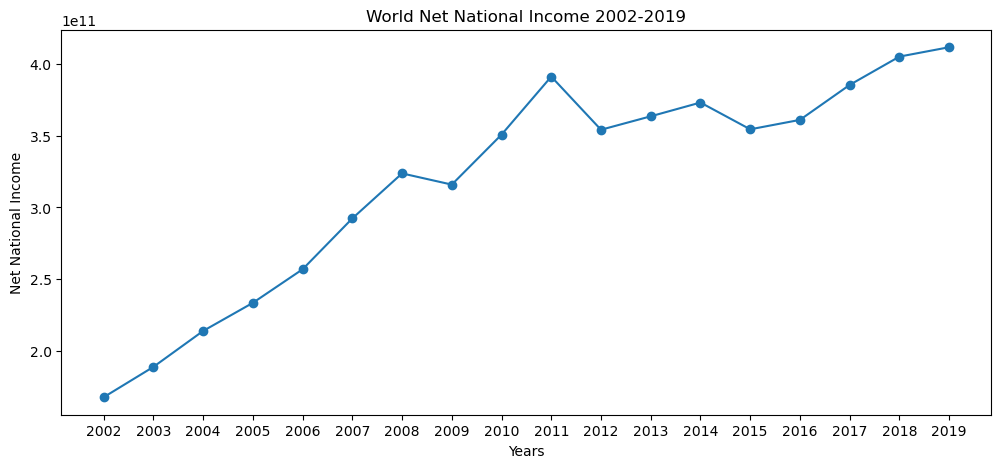

In [57]:
# Plot line charts for each variable:  National Income

x = nat_income_reduce.columns
y = nat_income_reduce.mean()

plt.figure(figsize=(12,5))
plt.plot(x,y, marker="o")

plt.title("World Net National Income 2002-2019")
plt.xlabel('Years')
plt.ylabel('Net National Income')

plt.savefig("output/Net_National_Income_LINE_GRAPH.png")
plt.show()

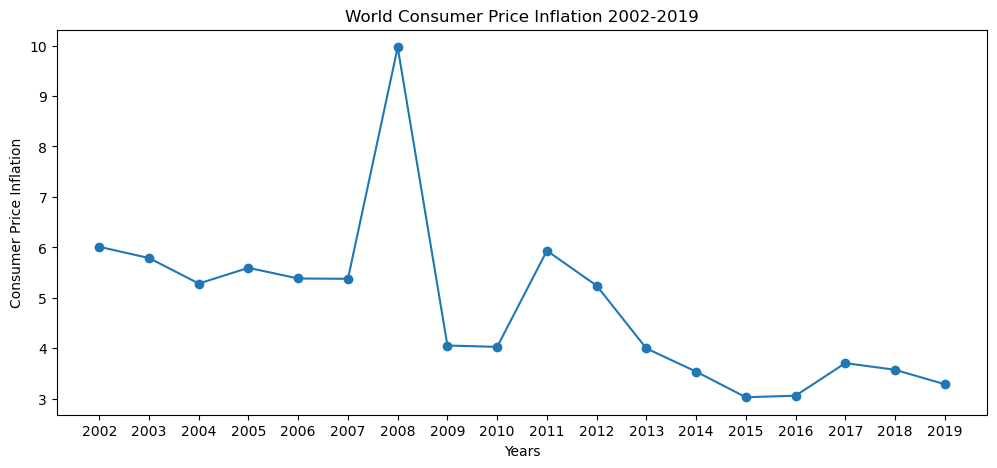

In [58]:
# Plot line charts for each variable:  Inflation

x = inflation_reduce.columns
y = inflation_reduce.mean()

plt.figure(figsize=(12,5))
plt.plot(x,y,  marker="o")

plt.title("World Consumer Price Inflation 2002-2019")
plt.xlabel('Years')
plt.ylabel('Consumer Price Inflation')

plt.savefig("output/Consumer_Price_Inflation_LINE_GRAPH.png")
plt.show()

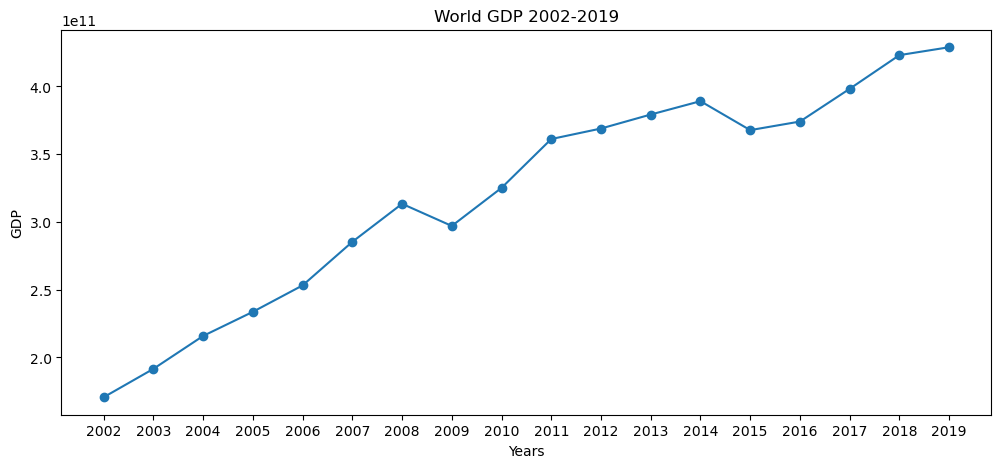

In [59]:
# Plot line charts for each variable:  GDP

x = gdp_reduce.columns
y = gdp_reduce.mean()

plt.figure(figsize=(12,5))
plt.plot(x,y,  marker="o")

plt.title("World GDP 2002-2019")
plt.xlabel('Years')
plt.ylabel('GDP')

plt.savefig("output/GDP_LINE_GRAPH.png")
plt.show()

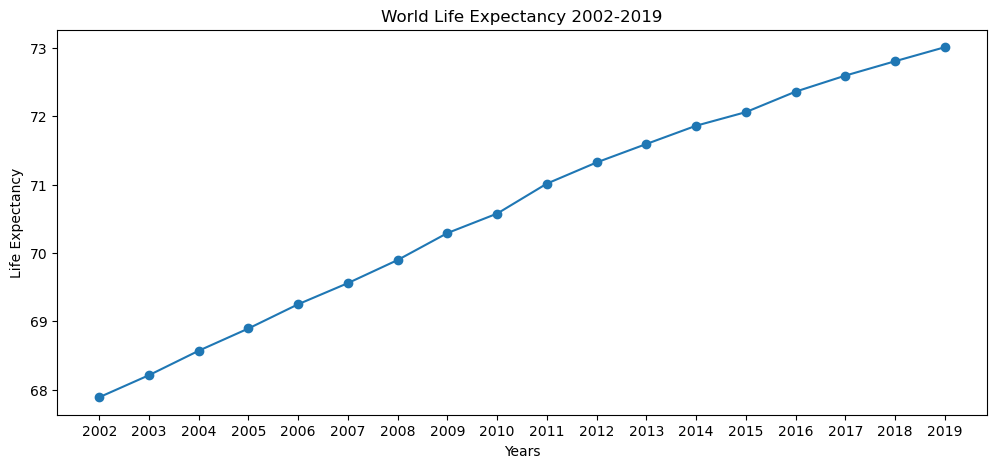

In [60]:
# Plot line charts for each variable:  Life Expectancy

x = life_exp_reduce.columns
y = life_exp_reduce.mean()

plt.figure(figsize=(12,5))
plt.plot(x,y, marker="o")

plt.title("World Life Expectancy 2002-2019")
plt.xlabel('Years')
plt.ylabel('Life Expectancy')

plt.savefig("output/Life_Expectancy_LINE_GRAPH.png")
plt.show()

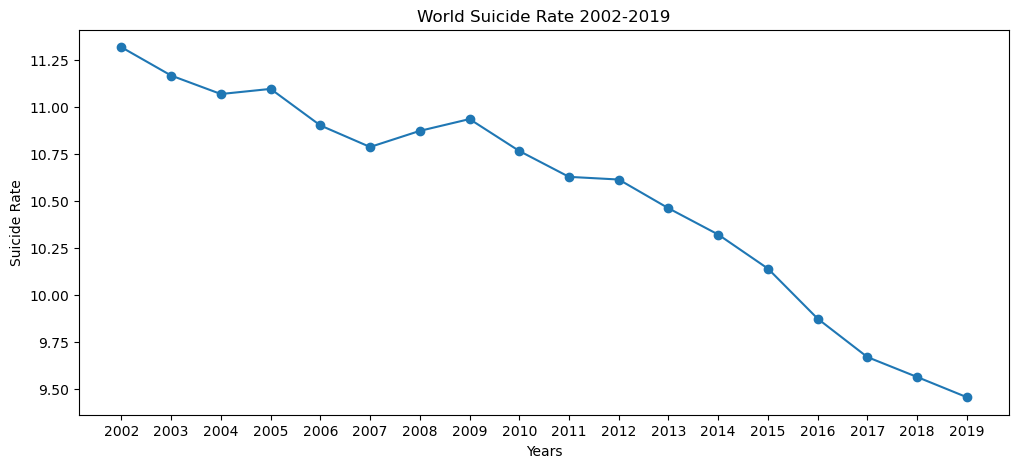

In [61]:
# Plot line charts for each variable:  Suicide Rate

x = suicide_rate_reduce.columns
y = suicide_rate_reduce.mean()

plt.figure(figsize=(12,5))
plt.plot(x,y,  marker="o")

plt.title("World Suicide Rate 2002-2019")
plt.xlabel('Years')
plt.ylabel('Suicide Rate')

plt.savefig("output/Suicide_Rate_LINE_GRAPH.png")
plt.show()

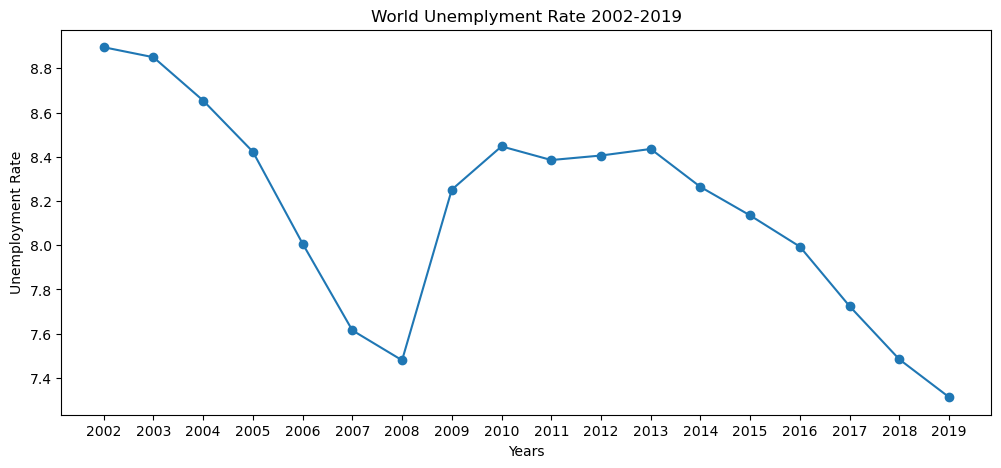

In [62]:
# Plot line charts for each variable:  Unemployment

x = unemployment_reduce.columns
y = unemployment_reduce.mean()

plt.figure(figsize=(12,5))
plt.plot(x,y,  marker="o")

plt.title("World Unemplyment Rate 2002-2019")
plt.xlabel('Years')
plt.ylabel('Unemployment Rate')

plt.savefig("output/Unemployment_Rate_LINE_GRAPH.png")
plt.show()
